# Unit 5 - Financial Planning

In [20]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import date, timedelta

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!

# Fetch current ETH price
# YOUR CODE HERE!

# Compute current value of my crpto
# YOUR CODE HERE!

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

NameError: name 'my_btc' is not defined

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [83]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [ ]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [ ]:

today_date

'2022-07-10'

In [50]:
#Closest date to day based on Alpaca Liscense
today_date = str(date.today() - timedelta(days=47))

# Format current date as ISO format
today = pd.Timestamp(today_date,tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current price data from Alpaca
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Preview DataFrame
df_portfolio

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-06-03 04:00:00+00:00  412.41  414.04  409.51  410.61  71994109   

                                                      AGG                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2022-06-03 04:00:00+00:00      577282  411.857196  102.67  102.905  102.64   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-06-03 04:00:00+00:00  102.82  6561090       19041  102.803378

In [52]:
# Pick AGG and SPY close prices
spy_close_price= float(df_portfolio["SPY"]["close"])
agg_close_price = float(df_portfolio["AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.82
Current SPY closing price: $410.61


In [ ]:
# Compute the current value of shares
# YOUR CODE HERE!

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

### Savings Health Analysis

In [94]:
# Set monthly household income
monthly_income = 12000

crypto_val = 1000
share_val = (spy_close_price * my_spy) + (agg_close_price * my_agg)

# Consolidate financial assets data
df_savings = {"amount" : 
              {"crypto" : crypto_val,
               "shares" : share_val
              }
            }
# Create savings DataFrame
df_savings = pd.DataFrame.from_dict(df_savings)

# Display savings DataFrame
display(df_savings)

,amount
crypto,1000.0
shares,41094.5


<AxesSubplot:title={'center':'Crypto & Stocks Savings Portfolio Composition'}, ylabel='amount'>

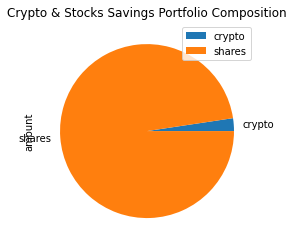

In [95]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Crypto & Stocks Savings Portfolio Composition")

In [102]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = share_val + crypto_val

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations, you are a baller!")
if total_savings == emergency_fund:
    print("Congratulations, you scored your financial goal!")
if total_savings < emergency_fund:
    funds_needed = emergency_fund - total_savings
    print(f"Warning, you need another {funds_needed} to go before you can rest easy")

Congratulations, you are a baller!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [64]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

#Set starting date for gathering Data(+47 for Alpacca Allowable Call Dates) 
starting_date = str(date.today() - timedelta(days=1873))

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp(starting_date, tz="America/New_York").isoformat()
end_date = pd.Timestamp(today_date, tz="America/New_York").isoformat()


# Get 5 year's worth of historical price data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_stock_data.sample()

SPY                                    \
                            open    high      low  close    volume   
timestamp                                                            
2017-06-30 04:00:00+00:00  242.3  242.71  241.575  241.8  86820694   

                                                      AGG                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2017-06-30 04:00:00+00:00      241580  242.015951  109.62  109.6273  109.46   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-06-30 04:00:00+00:00  109.51  2626939       10668  109.546443

In [68]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 100,
    num_trading_days = 252*30
)

In [69]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-06-05 04:00:00+00:00  244.02  244.30  243.76  243.99   44698825   
2017-06-06 04:00:00+00:00  243.34  243.98  243.12  243.21   50375430   
2017-06-07 04:00:00+00:00  243.61  243.92  242.83  243.66   54144311   
2017-06-08 04:00:00+00:00  243.80  244.33  243.17  243.78   65950691   
2017-06-09 04:00:00+00:00  244.07  245.01  241.95  243.41  132256362   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-06-05 04:00:00+00:00      136071  244.029429          NaN  109.66   
2017-06-06 04:00:00+00:00      160561  243.517742    -0.003197  109.87   
2017-06-07 04:00:00+00:00      182098  243.535814     0.001850  109.81   
2017-06-08 04:00:00+00:00      210451  243.697117     0.000492  109.70   
2017-06-09 04:00:00+00:00      430463  243.643527    -0.001518  109.51   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2017-06-05 04:00:00+00:00  109.74  109.6000  109.67  2450624        9907   
2017-06-06 04:00:00+00:00  109.95  109.8100  109.89  1607846        8264   
2017-06-07 04:00:00+00:00  109.87  109.7000  109.76  1903624        9268   
2017-06-08 04:00:00+00:00  109.70  109.5101  109.65  1532737        8301   
2017-06-09 04:00:00+00:00  109.63  109.4600  109.56  1616833        8395   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-06-05 04:00:00+00:00  109.693010          NaN  
2017-06-06 04:00:00+00:00  109.897602     0.002006  
2017-06-07 04:00:00+00:00  109.768804    -0.001183  
2017-06-08 04:00:00+00:00  109.622036    -0.001002  
2017-06-09 04:00:00+00:00  109.536583    -0.000821

In [71]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

#REMEMBER TO CHANGE BACK TO 1000

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998275,0.997733,1.010880,0.998762,0.994767,0.997589,1.010362,1.001263,0.991929,0.994726,...,1.000033,1.005903,1.002255,1.003213,0.998346,0.995819,0.997961,1.003079,1.000626,0.988170
2,0.993828,0.995248,1.018486,1.005981,0.998970,1.005492,1.009772,0.988964,0.990853,0.996353,...,1.001572,1.002503,0.999843,1.002216,0.992261,0.995975,0.998887,1.004691,1.006549,0.982334
3,0.997877,1.001182,1.017334,1.005554,0.999288,1.009105,1.013063,0.987265,0.986485,1.006591,...,1.003780,1.009214,0.992871,0.999014,0.993213,0.996433,0.999722,1.006102,1.003759,0.980021
4,1.005706,1.000585,1.022827,1.010395,0.989768,1.003447,1.011981,0.981836,0.979104,1.011976,...,1.011721,1.012221,0.988093,1.003103,0.997934,0.990435,1.002187,0.999768,1.001435,0.976875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.923860,2.518619,4.383500,7.048049,2.880482,2.930650,1.919747,2.950074,11.435927,5.759524,...,2.614048,4.595253,4.157040,5.943275,4.977459,3.395036,2.289687,7.528856,5.505528,2.480859
7557,4.905593,2.512886,4.397757,6.985616,2.899332,2.915028,1.911140,2.931102,11.480094,5.726391,...,2.598663,4.575462,4.145652,5.932584,4.991347,3.398442,2.295867,7.512873,5.518846,2.476080
7558,4.920317,2.486351,4.404983,6.956161,2.873379,2.899128,1.907561,2.894467,11.496589,5.753484,...,2.593350,4.598735,4.161083,5.898005,5.018009,3.406272,2.292064,7.552857,5.553740,2.462093
7559,4.965996,2.479346,4.360129,7.012176,2.884941,2.879647,1.899685,2.877279,11.549057,5.742397,...,2.611283,4.634998,4.230664,5.835473,4.990403,3.414756,2.277585,7.599742,5.525234,2.448022


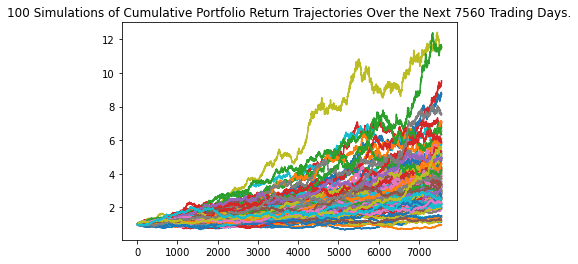

In [73]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

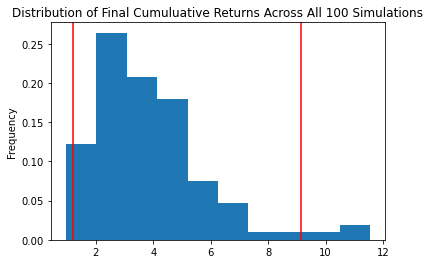

In [75]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [77]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           100.000000
mean              3.863638
std               1.997410
min               0.951583
25%               2.509337
50%               3.374285
75%               4.899074
max              11.551708
95% CI Lower      1.213021
95% CI Upper      9.151903
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [78]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $24260.41 and $183038.06


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [79]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $36390.62 and $274557.09


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")